In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from skimage.transform import resize
from PIL import Image
from scipy import ndimage

In [2]:
def load_dataset():
    # Load Train dataset
    train_dataset = h5py.File('train_catvnoncat.h5', 'r')
    # print(train_dataset.keys())
    # Train features as a numpy aaray
    X_train = np.array(train_dataset['train_set_x'][:])
    # Train labels
    Y_train = np.array(train_dataset['train_set_y'][:])
    # Classes
    classes = np.array(train_dataset['list_classes'][:])
    
    # Load Test dataset
    test_dataset = h5py.File('test_catvnoncat.h5', 'r')
    # print(test_dataset.keys())
    # Test features
    X_test = np.array(test_dataset['test_set_x'][:])
    # Test labels
    Y_test = np.array(test_dataset['test_set_y'][:])
    
    # Reshape labels to 1 row
    Y_train = Y_train.reshape(1, Y_train.shape[0])
    Y_test = Y_test.reshape(1, Y_test.shape[0])
    
    return X_train, Y_train, X_test, Y_test, classes    

In [3]:
def sigmoid(z):
    '''
    Compute sigmoid function:
        If we used hypothesis ((w.T)X+b) then the hypothesis can be
        grater than 1 or less than 0.
        To get value between 0 and 1 sigmoid function is used.
    '''
    A = 1 / (1 + np.exp(-z))
    return A             

In [4]:
def compute_cost_gradient(X, Y, w, b):
    m = X.shape[1]
    ########## Forward Propagation ############
    # Compute sigmoid
    A = sigmoid(np.dot(w.T,X) + b)
    # Compute cost
    cost = -(1/m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)))
    
    ########## Backward propagation ############
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    
    gradient = {'dw' : dw,
               'db' : db}
    return cost, gradient

In [5]:
def optimize(X, Y, w, b, learning_rate, num_iterations):
    for i in range(num_iterations):
        ########### 4 COMPUTE COST AND GRADIENT ##############
        cost, gradient = compute_cost_gradient(X, Y, w, b)
        
        # Derivatives
        dw = gradient['dw']
        db = gradient['db']
        
        # Update parameters
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
    parameters = {'w' : w,
                 'b' : b}
    return parameters

In [6]:
def predict(X, w, b):
    '''
    Compute the sigmoid function with paramaters w and b
    if the value <= 0.5 then y = 0
    if the value > 0.5 then y =1
    '''
    prediction = np.zeros(shape = [1, X.shape[1]])
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5 :
            prediction[0, i] = 0
        else :
            prediction[0, i] =1
    
    return prediction

In [7]:
########### 1 LOAD DATA###########
X_train, Y_train, X_test, Y_test, classes = load_dataset()

m_train = X_train.shape[0] # Number of training examples
m_test = X_test.shape[0] # Number of test examples
num_px = X_train.shape[1] # Width and height of an image

########### 2 PREPROCESSING #############
'''
Reshape image :
    The shape of a image is (num_px, num_px, 3).
    num_px : width and height size
    image store as a 3 matrix of R,G,B, so reshape it into one matrix.
'''
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

'''
Standardize the data:
    Since each pixel is size between 0-255, divide the data by 255
'''
X_train = X_train/255
X_test = X_test/255

########### 3 INITIALIZE PARAMETERS ############
w = np.zeros(shape = [X_train.shape[0],1])
b = np.zeros(shape = [1])

########### 5 OPTIMIZATION ##############
num_iterations = 2000
learning_rate = 0.005

parameters = optimize(X_train, Y_train, w, b, learning_rate, num_iterations)

w = parameters['w']
b = parameters['b']

########### 6 PREDICTION ############
prediction_train = predict(X_train, w, b)
prediction_test = predict(X_test, w, b)

print("Train Accuracy : ", 100 - np.mean(np.abs(Y_train - prediction_train) * 100))
print("Test Accuracy : ", 100 - np.mean(np.abs(Y_test - prediction_test) * 100))


Train Accuracy :  99.04306220095694
Test Accuracy :  70.0


y =  1.0
Predict its a  cat


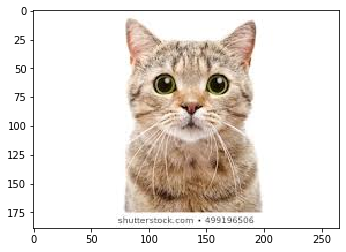

In [8]:
############## PREDICT NEW DATA #############
image_name = 'cat1.jpeg' # Image name
'''
Open image and store as a numpy array.
Then reshape the image array using skimage.transform.resize function
'''
image = np.array(Image.open(image_name))
# Resize the image into (num_px*num_px*3) for tha scipy is used

re_image = resize(image, (num_px, num_px)).reshape(1, num_px * num_px * 3).T

predict = predict(re_image, w, b)

# Plot image
plt.imshow(image)
print('y = ', np.squeeze(predict))
print('Predict its a ', classes[int(np.squeeze(predict)),].decode("utf-8"))
